In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Ingresados       Altas      Bajas
Provincia Fecha                                        
Sevilla   2020-04-20    7.572614   72.363636  20.903955
          2020-04-27    6.750241   49.578059  10.280374
Total     2020-04-13   18.121599  146.491228  65.987780
          2020-04-20    9.613459   64.158617  24.294479
          2020-04-27    5.390097   51.440074  14.215202

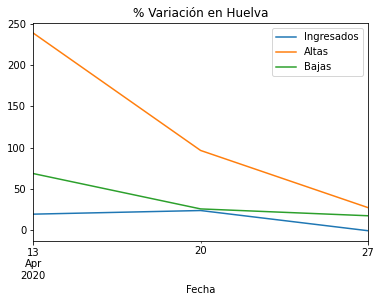

In [7]:
dfG.loc['Huelva'].plot(title='% Variación en Huelva')
plt.show()

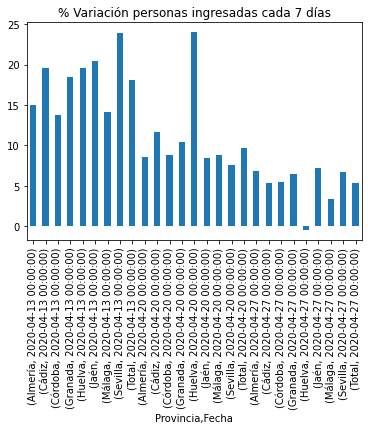

In [8]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Ingresados'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [9]:
dfG.describe()

,Ingresados,Altas,Bajas
count,27.000000,27.000000,27.000000
mean,11.371219,90.802986,36.874465
std,6.499354,61.377928,26.829141
min,-0.471698,12.720848,6.976744
25%,6.778262,50.591392,18.950112
50%,8.870968,75.510204,25.000000
75%,16.577139,111.345152,51.295510
max,23.976608,238.888889,105.769231


In [10]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

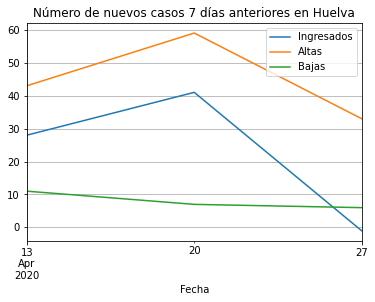

In [11]:
dfN.loc['Huelva'].plot(title='Número de nuevos casos 7 días anteriores en Huelva', grid=True)
plt.show()

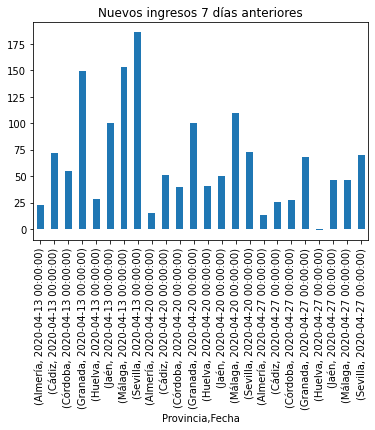

In [12]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Ingresados'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

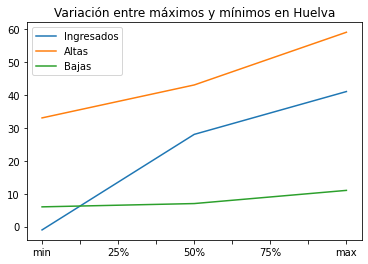

In [13]:
dfN.loc['Huelva'].describe().loc['min':'max'].plot(title='Variación entre máximos y mínimos en Huelva')
plt.show()

In [14]:
print('Nuevos casos en los 7 días anteriores')
print(dfN.sort_index())

Nuevos casos en los 7 días anteriores
                      Ingresados  Altas  Bajas
Provincia Fecha                               
Almería   2020-04-13        23.0   37.0   12.0
          2020-04-20        15.0   67.0    8.0
          2020-04-27        13.0   85.0    3.0
Cádiz     2020-04-13        72.0   96.0   29.0
          2020-04-20        51.0   83.0   15.0
          2020-04-27        26.0   36.0   27.0
Córdoba   2020-04-13        55.0  113.0   19.0
          2020-04-20        40.0  171.0   23.0
          2020-04-27        27.0  326.0   16.0
Granada   2020-04-13       149.0  231.0   56.0
          2020-04-20       100.0  344.0   35.0
          2020-04-27        68.0  406.0   28.0
Huelva    2020-04-13        28.0   43.0   11.0
          2020-04-20        41.0   59.0    7.0
          2020-04-27        -1.0   33.0    6.0
Jaén      2020-04-13       100.0  144.0   55.0
          2020-04-20        50.0   49.0   33.0
          2020-04-27        46.0   71.0   15.0
Málaga    2020-04-13  

In [15]:
provincia = 'Huelva'
dias = 10
data = df.set_index(['Provincia', 'Fecha']).loc[provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(dias).copy()
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia
# Correcciones
# El día 25/04/2020 el número de personas ingresadas calculado es negativo.
# Al ser datos acumulados lo que indica es una corrección en el número de ingresados acumulados a ese día
data.loc['2020-04-25']['Ingresados'] = 0

Nuevos casos en los últimos 10 días en Huelva. (Nuevos ingresos hospitalarios)


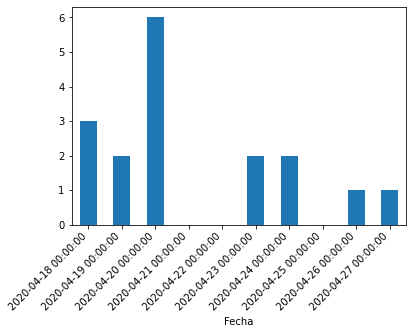

In [16]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Ingresados'].plot(kind='bar')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

Nuevos casos en los últimos 10 días en Huelva. (Variación entre mínimos y máximos)


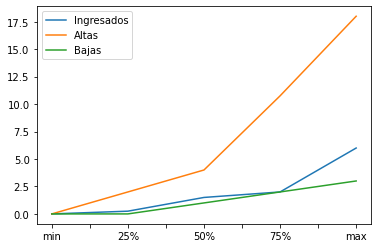

In [17]:
print(titulo + '. (Variación entre mínimos y máximos)')
data.describe().loc['min':'max'].plot()
plt.show()

In [18]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Huelva
            Ingresados  Altas  Bajas
Fecha                               
2020-04-18         3.0   18.0    3.0
2020-04-19         2.0   11.0    2.0
2020-04-20         6.0    2.0    0.0
2020-04-21         0.0   10.0    0.0
2020-04-22         0.0    0.0    1.0
2020-04-23         2.0    6.0    0.0
2020-04-24         2.0    2.0    2.0
2020-04-25         0.0   12.0    2.0
2020-04-26         1.0    2.0    1.0
2020-04-27         1.0    1.0    0.0
